# Rodrigo Vega Vilchis - Tarea 2 Sistemas Dinámicos no lineales

## Ejercicios:




In [1]:
using LinearAlgebra
using PyPlot

using PyCall
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rockdrigo6/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>

In [2]:
"""Runge-Kutta 4. La función recibe como parámetros una función f(x), una condición inicial, un tiempo inicial
un tiempo final y un paso de integración, igual que el integrador de Euler"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end

RK4 (generic function with 1 method)

# Ejercicios:
$\;$
    <ol>
   <li>
#### Analice analíticamente el sistema de **Predador-Presa**:
   </li>      
   
$
\;
\dot{N_1} = \alpha N_1 - \beta N_1 N_2 \\
\;\\
\dot{N_2} = -\gamma N_2 + \delta N_1 N_2 
$    

Donde $\alpha, \beta, \gamma, \delta $ son constantes positivas.
<br> 
        <ol><br>
            <li> 
       Muestre **_analíticamente_** que el origen $E_0 = (0,0)$ (*extinción total*), siempre tiene una  estabilidad de **_punto silla_**, con una dirección **positiva** (*atractora*) y una **negativa** (*repulsora*), para cualesquiera que sean los valores de los parámetros del modelo.
            </li>            
            <li>
Muestre **_analíticamente_** que el punto de equilibrio $E_c = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ (*equilibrio de coexistencia*), tiene una estabilidad de tipo **_centro_**.           
            </li>
        </ol>
   </li>    
</li>
$\;$  
   <li>
Estudie analíticamente el sistema de <b>Competencia de Especies</b>:
        </li> 
$\;$  
$
\;
\dot{N_1} = r_1N_1 \left[1 - \dfrac{N_1 + \alpha N_2}{K_1} \right] \\ 
\;\\
\dot{N_2} = r_2N_2 \left[1 - \dfrac{N_2 + \beta N_1}{K_2} \right]
$    

Donde $r_1, r_2, K_1, K_2, \alpha, \beta $ son constantes positivas.
<br> 
        <ol><br>
            <li> 
       <b>Linealice el sistema cerca de sus puntos de equilibrio:</b> 
  
 <ol>             
<li> Encuentre los <b>4 puntos de equilibrio</b> del sistema, (los tres triviales, y la interesección de las Isoclinas)</li>
<li> Calcule análiticamente la matrix Jacobiana del Sistema </li>
<li> Evalue el Jacobiano del Sistema en los  puntos de equilibrio</li>
<li> Calcule el espectro (conjunto de valores y vectores propios) en cada caso</li>
  </ol>
 </li> <br> 
            
     
  <li>       
<b>Analice la estabilidad de los puntos de equilibrio, respecto a los parametros del modelo:</b>              
 <ol>             
<li>Demuestre que el $E_0 = (0,0)$ siempre es un punto fuente (repulsor) independensientemente de los valores de los parametros del modelo.</li>
<li> Calcule la estabilidad de los puntos $E_1$ y $E_2$</li>
<li>Muestre analiticamnte bajo que parametros del sistema existe el punto $E_3$ y bajo que condiciones tiene una dirección atractora o bien una repulsora </li>
</ol> 
 </li>   <br>  
    
  <li>       
Muestre computacionalmente el plano fase (es decir el campo de pendientes ası́ como las isoclinas del sistema) y graifique algunas curvas solución que apoyen la descripción cualitativa realizada, para los <b>4 posibles casos</b> de estabilidad del sistema.
 </li>   <br>     
            


   

</ol>

</ol>

## Puntos extra (sobre calificación final de la tarea)


<ol>
    
   <li> 
<b> ¿Cómo se tendría que modificar el modelo de predador presa para que pudiera haber una coexistencia
que no fuera una oscilación, sino que las poblaciones alcanzaran valores estables?</b>
Justifique y argumente ampliamente su respuesta.  

Apóyese y modifique el código visto en clase, para mostrar una grafica del plano fase del sistema modificado bajo esas condiciones, que complemente y refuerce su respuesta .
       
(<b>1 pto extra</b>)     
        </li>   
 
 <br> 
    
   <li>
Estudie analíticamente el sistema de <b>Lotka-Volterra generalizado</b> para dos especies:
        </li>     
    
$
\dot{N_1} = N_1 \left[r_1 - \left( a_{11}N_1  + a_{12}N_2 \right) \right] \\
\dot{N_2} = N_2 \left[r_2 - \left( a_{21}N_1  + a_{22}N_2 \right) \right] 
$    

Donde $r_i$ son constantes positivas y $a_{ij}$ son coeficientes reales.
        <ol><br>
            <li> 
       <b>Analice cualitativamente el sistema, linealizandolo:</b> 
  
 <ol>             
<li> Encuentre los <b>3 puntos de equilibrio</b> no triviales del sistema</li>     
<li> Calcule la forma general de los <b>puntos de equilibrio</b> no triviales del sistema. <i>Hint: recuerde la Regla de Cramer</i></li>
<li> Calcule análiticamente la matrix Jacobiana del Sistema </li>
<li> Evalue el Jacobiano del Sistema en todos los puntos de equilibrio</li>
<li> Calcule la forma general del polinomio caracteristico del Jacobiano evaluado en los los puntos de equilibrio del sistema.<i>Hint: recuerde la forma general del mismo, usando la traza y el determinante</i></li>
<li> Con base en el inciso anterior, discuta brevemente que estabilidad tendrían los puntos de equilibrio, de acuerdo a los diferentes parametros del sistema.</li>   
  </ol>
 </li> <br> 
            
    
  <li>       
Muestre computacionalmente el plano fase (es decir el campo de pendientes ası́ como las isoclinas del sistema) y graifique algunas curvas solución que apoyen la descripción cualitativa general del sistema. De ser posible use <a href="https://kapernikov.com/ipywidgets-with-matplotlib/">Ipywidgets</a> para poder variar de forma interactiva los parametros.
      
(<b>2 ptos extra</b>)         
      
 </li>  
   
</ol>

# Ejercicio 1: Sistema presa-depredador

Para poder conocer la estabilidad del sisteme de depredador presa, necesitamos determinar la matriz Jacobiana del sistema, y evaluarla en los puntos críticos de interés, específicamente en $E=(0,0)$ y en $E=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. La matriz jacobiana está dada por

$$
\mathbb{J}=\begin{pmatrix}
\frac{\partial \dot{N}_1}{\partial N_1} & \frac{\partial \dot{N}_1}{\partial N_2}\\
\frac{\partial \dot{N}_2}{\partial N_1} & \frac{\partial \dot{N}_2}{\partial N_2}
\end{pmatrix}
$$

donde las funciones $\dot{N}_1$ y $\dot{N}_2$ son las de nuestro sistema de presa depredador, entonces

$$
\mathbb{J}=\begin{pmatrix}
\alpha-\beta N_2 & -\beta N_1\\
\delta N_2 & -\gamma+\delta N_1
\end{pmatrix}
$$

evaluando en el punto crítico $E=(0,0)$, tenemos

$$
\mathbb{J}\ \big |_{(0,0)}=\begin{pmatrix}
\alpha & 0\\
0 & -\gamma
\end{pmatrix}
$$

de aquí podemos observar rápidamente que los eigenvalores de esta matriz son $\lambda_1=\alpha$ y $\lambda_2=-\gamma$, y como estamos suponiendo que las constantes del sistemas son reales y mayores a cero, concluimos que la estabilidad del sistema depredador presa es un punto silla para cualquier $\alpha>0$ y $\gamma>0$ en $\mathbb{R}$. Veámoslo de manera gráfica en el siguiente espacio fase

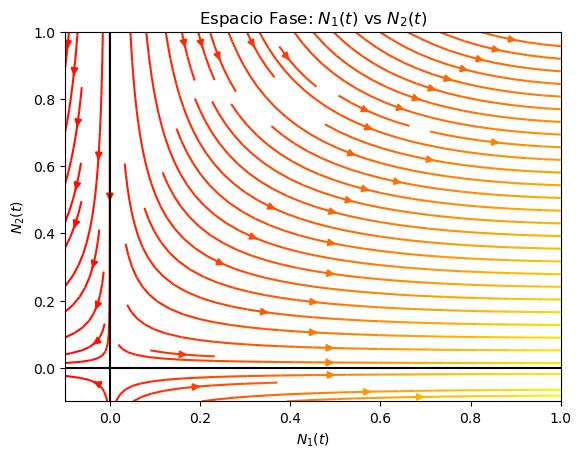

PyObject Text(27.400000000000013, 0.5, '$N_2(t)$')

In [3]:
#=su campo de direcciones; 
en este caso α=2, β=1.2, γ=1 y δ=0.9 =#

xs = collect(-0.1:0.1:1)
ys = collect(-0.1:0.1:1)

X,Y = np.meshgrid(xs,ys)

U = 2X - 1.2X.*Y
V = -Y + 0.9X.*Y
plt.title(L"Espacio Fase: $N_1(t)$ vs $N_2(t)$")
plt.axhline(0,color="black")
plt.axvline(0,color="black")
plt.streamplot(xs,ys,U,V,color=U, cmap=plt.cm.autumn)
plt.xlabel(L"$N_1(t)$")
plt.ylabel(L"$N_2(t)$")

De aqui podemos ver que tenemos un **atractor** que va hacia el origen de manera vertical (representa a $\lambda_1=\alpha$), y un **repulsor** que va hacia la derecha alejándose del origen (representa a $\lambda
_2=-\gamma$).

Ahora veamos que sucede para el otro punto crítico $E=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$, para ello necesitamos evaluar la matriz jacobiana en dicho punto crítico para despúes poder analizar los valores propios del sistema y comprobar que en efecto se trata de un centro. Entonces

$$
\mathbb{J}\ \big |_{(\frac{\gamma}{\delta},\frac{\alpha}{\beta})}=\begin{pmatrix}
0 & -\frac{\gamma}{\delta}\beta\\
\frac{\alpha}{\beta}\delta & 0
\end{pmatrix},\qquad\text{supongamos }a=\frac{\gamma}{\delta}\beta,\ b=\frac{\alpha}{\beta}\delta
$$

entonces

$$
\mathbb{J}\ \big |_{(\frac{\gamma}{\delta},\frac{\alpha}{\beta})}=\begin{pmatrix}
0 & -a\\
b & 0
\end{pmatrix}
$$

determinando el polinomio característico

\begin{align*}
\lambda^2-\lambda Tr\mathbb{J}+\det\mathbb{J}&=\lambda^2-\lambda\cdot 0+ab\\
&=\lambda^2+ab\\
&=0
\end{align*}

las raices del polinomio característico son de la forma

$$\lambda_{1,2}=\pm iab$$

que corresponden a eigenvalores que producen centros, (suponiendo que $ab\in\mathbb{R}$). Veamos a continuación, la estabilidad del sistema dinámico en este punto crítico.

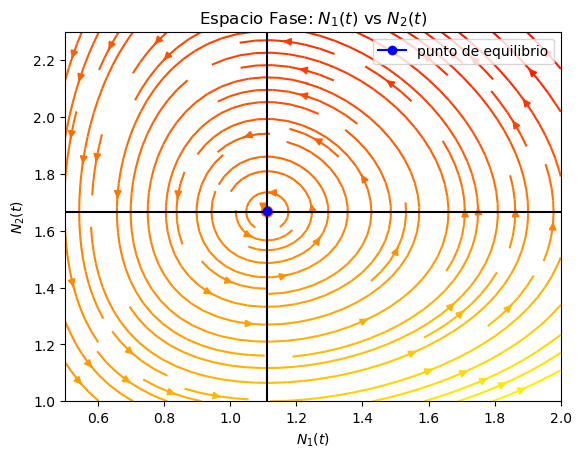

PyObject <matplotlib.legend.Legend object at 0x7fef3b99db80>

In [4]:
#=su campo de direcciones; 
en este caso α=2, β=1.2, γ=1 y δ=0.9 =#

xs = collect(0.5:0.1:2)
ys = collect(1:0.1:2.3)

X,Y = np.meshgrid(xs,ys)

U = 2X - 1.2X.*Y
V = -Y + 0.9X.*Y
plt.title(L"Espacio Fase: $N_1(t)$ vs $N_2(t)$")
plt.axhline(5/3,color="black")
plt.axvline(10/9,color="black")
plt.streamplot(xs,ys,U,V,color=U, cmap=plt.cm.autumn)
plt.xlabel(L"$N_1(t)$")
plt.ylabel(L"$N_2(t)$")
plt.plot(1.11,1.67, marker="o", color="blue",label = "punto de equilibrio") #aquí se encuentra el punto de equilbtio de coexistencia
plt.legend(loc = "upper right")

Como podemos ver, se forman centros entorno al segundo punto crítico que simboliza el punto de equilibrio de coexistencia entre ambas especies.

# Ejercicio 2: Sistema competencia de especies

**Punto A. Linealice el sistema cerca de sus puntos de equilibrio**

* Encuentre los 4 puntos de equilibrio del sistema, (los triviales, y la intersección de isoclinas)

Sabemos que el punto crítico (y de equilibrio) más trivial es para cuando tenemos la extinción de las dos especies $E_1=(0,0)$, es decir, para $N_1=0$ y $N_2=0$. Del sistema de ecuaciones no lineal

\begin{align*}
\dot{N}_1&=r_1N_1\left[1-\frac{N_1+\alpha N_2}{K_1}\right]=0\\
\dot{N}_2&=r_2N_2\left[1-\frac{N_2+\beta N_1}{K_2}\right]=0\\
\end{align*}

podemos suponer para $N_1=0$ para la segunda ecuación y por tanto

\begin{align*}
r_2N_2\left[1-\frac{N_2}{K_2}\right]&=0\\
N_2&=K_2
\end{align*}

por tanto tenemos un segundo punto de equilibrio $E_2=(0,K_2)$. De manera análoga, para la primera ecuación ($\dot{N}_1$), haciendo $N_2=0$, tenemos el punto crítico $E_3=(K_1,0)$; tenemos que notar que estos puntos de equilibrio es para cuando una de las dos especies se extingue mientras la otra se estabiliza. Finalmente, necesitamos realizar un sistema de ecuaciones entre ambas ecuaciones del sistema para poder conocer el punto de equilibrio en donde ambas especies coexisten. Del sistema podemos reescribirlo

$$
\begin{cases}
1-\frac{N_1+\alpha N_2}{K_1}=0\\
1-\frac{N_2+\beta N_1}{K_2}=0
\end{cases}
$$

De la primera ecuación, despejamos $N_1$

\begin{align*}
\frac{N_1+\alpha N_2}{K_1}&=1\\
N_1+\alpha N_2&=K_1\\
N_1&=K_1-\alpha N_2
\end{align*}

Sustituyendo en la otra ecuación tenemos

\begin{align*}
\frac{N_2+\beta(K_1-\alpha N_2)}{K_2}&=1\\
N_2+\beta K_1-\beta\alpha N_2&=K_2\\
N_2(1-\beta \alpha)+\beta K_1&=K_2\\
N_2&=\frac{K_2-\beta K_1}{1-\beta\alpha}
\end{align*}

por lo tanto $N_1$ es igual a

$$N_1=K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}$$

En conclusión, el punto crítico de coexistencia entre especies es igual a

$$E_4=\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha},\frac{K_2-\beta K_1}{1-\beta\alpha}\right)$$

hice por mi cuenta un álgebra de comprobación para ver si se cumplen las relaciones, más adelante mostraré gráficamente que estos puntos de equilibrio son los adecuados.

* Calcule analíticamente la matriz Jacobiana del sistema

recordemos que la matriz Jacobiana está dada por 

\begin{align*}
\mathbb{J}&=\begin{pmatrix}
\frac{\partial \dot{N}_1}{\partial N_1} & \frac{\partial \dot{N}_1}{\partial N_2}\\
\frac{\partial \dot{N}_2}{\partial N_1} & \frac{\partial \dot{N}_2}{\partial N_2}
\end{pmatrix}\\
&=\begin{pmatrix}
r_1-\frac{2r_1N_1}{K_1}-\frac{\alpha r_1N_2}{K_1} & -\frac{r_1\alpha N_1}{K_1}\\
-\frac{r_2\beta N_2}{K_2} & r_2-\frac{2r_2N_2}{K_2}-\frac{\beta r_2N_1}{K_2}
\end{pmatrix}
\end{align*}

* Evaluando en los puntos críticos tenemos

$$
\mathbb{J}\ \big |_{(0,0)}=\begin{pmatrix}
r_1 & 0\\
0 & r_2
\end{pmatrix}
$$

$$
\mathbb{J}\ \big |_{(0,K_2)}=\begin{pmatrix}
r_1-\frac{\alpha r_1K_2}{K_1} & 0\\
-r_2\beta &  r_2
\end{pmatrix}
$$

$$
\mathbb{J}\ \big |_{(K_1,0)}=\begin{pmatrix}
-r_1 & -r_1\alpha\\
0 & r_2-\frac{\beta r_2K_1}{K_2}
\end{pmatrix}
$$

$$
\mathbb{J}\ \big |_{\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha},\frac{K_2-\beta K_1}{1-\beta\alpha}\right)}=\begin{pmatrix}
A & B\\
C & D
\end{pmatrix}
$$

Donde $A$, $B$, $C$ y $D$ representan las respectivas evaluaciones y son distintas de cero (están muy grotescas las expresiones). Son las siguientes

\begin{align*}
A&=r_1-\frac{2r_1}{K_1}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)-\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
B&=-\frac{r_1\alpha}{K_1}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)\\
C&=-\frac{r_2\beta}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
D&=r_2-\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)-\frac{\beta r_2}{K_2}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)
\end{align*}


* Calcule el espectro (conjunto de valores propios y vectores propios) en cada caso

En general, para calcular los valores propios para cada evaluación, tenemos que aplicar el polinomio característico

$$\lambda^2-\lambda\cdot Tr\mathbb{J}+\det \mathbb{J}$$

Para $\mathbb{J}\ \big|_{(0,0)}$ tenemos una matriz diagonal por lo que sus eigenvalores forzosamente son 

$$\lambda_1=r_1,\qquad\lambda_2=r_2$$

y sus eigenvectores asociados a los valores propios son

$$\vec{v}_{\lambda_1}=(1,0),\qquad\vec{v}_{\lambda_2}=(0,1)$$

Para $\mathbb{J}\ \big|_{(0,K_2)}$ tenemos

\begin{align*}
\lambda^2-\lambda Tr\mathbb{J}+\det\mathbb{J}&=\lambda^2-\lambda\left(r_1-\frac{\alpha r_1K_2}{K_1}-r_2\right)-r_2\left(r_1-\frac{\alpha r_1K_2}{K_1}\right)\\
&\text{Definimos }T_1=r_1-\frac{\alpha r_1K_2}{K_1}-r_2,\qquad D_1=r_2\left(r_1-\frac{\alpha r_1K_2}{K_1}\right)\\
&=\lambda^2-\lambda T_1-D_1\\
\lambda_1&= \frac{T_1+\sqrt{T_1^2-4D_1}}{2}\\
\lambda_2&= \frac{T_1-\sqrt{T_1^2-4D_1}}{2}\\
\end{align*}





Para $\mathbb{J}=\ \big|_{(K_1,0)}$ tenemos un caso similar que el anterior


\begin{align*}
\lambda^2-\lambda Tr\mathbb{J}+\det\mathbb{J}&=\lambda^2-\lambda\left(r_2-\frac{\beta r_2K_1}{K_2}-r_1\right)-r_1\left(r_2-\frac{\beta r_2K_1}{K_2}\right)\\
&\text{Definimos } T_2=r_2-\frac{\beta r_2K_1}{K_2}-r_1,\qquad D_2=r_1\left(r_2-\frac{\beta r_2K_1}{K_2}\right)\\
&=\lambda^2-\lambda T_2+D_2\\
\lambda_1&=\frac{T_2+\sqrt{T_2^2-4D_2}}{2}\\
\lambda_2&=\frac{T_2-\sqrt{T_2^2-4D_2}}{2}\\
\end{align*}





Para $\mathbb{J}\ \big|_{\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha},\frac{K_2-\beta K_1}{1-\beta\alpha}\right)}$ tenemos

\begin{align*}
\lambda^2-\lambda(A+D)+(AD-CB)\\
\text{entonces}\\
\lambda_1=\frac{(A+D)+\sqrt{(A+D)^2-4(AD-CB)}}{2}\\
\lambda_2=\frac{(A+D)-\sqrt{(A+D)^2-4(AD-CB)}}{2}
\end{align*}

**Punto B. Analice la estabilidad de los puntos de equilibrio, respecto a los parámetros del modelo**

* Demuestre que  $E_1=(0,0)$ siempre es un punto fuente (repulsor) independientemente de los valores propios del modelo

De acuerdo con el punto anterior en los eigenvalores de la matriz Jacobiana $\mathbb{J}\ \big|_{(0,0)}$ teníamos los valores propios asociados

$$\lambda_1=r_1,\qquad \lambda_2=r_2$$

pues la matriz es diagonal. Como ambos eigenvalores son positivos y suponemos (sin pérdida de generalidad) que $\lambda_1>\lambda_2>0$, entonces podemos concluir que para cualesquiera valores, el caso $\mathbb{J}\ \big|_{(0,0)}$ produce una fuente repulsora.

**Nota: en el punto C, confirmaremos toda la teoría hecha hasta ahora.**

* Calcule la estabilidad de $E_2$ y $E_3$

Para calcular la estabilidad de los puntos críticos en donde una de las especies se extingue mientras la otra prevalece, necesitamos hacer el mismo análisis que en el punto anterior. Los valores propios para $\mathbb{J}\ \big |_{(0,\frac{K_1}{\alpha})}$ y $\mathbb{J}\ \big|_{(\frac{K_2}{\beta},0)}$ respectivamente son

\begin{align*}
\lambda_1&=\frac{T_1+\sqrt{T_1^2-4D_1}}{2}\\
\lambda_2&=\frac{T_1-\sqrt{T_1^2-4D_1}}{2}\\
&\text{con }T_1=r_1-\frac{\alpha r_1K_2}{K_1}-r_2,\qquad D_1=r_2\left(r_1-\frac{\alpha r_1K_2}{K_1}\right)\\
&\text{y}\\
\lambda_1&=\frac{T_2+\sqrt{T_2^2-4D_2}}{2}\\
\lambda_2&=\frac{T_2-\sqrt{T_2^2-4D_2}}{2}\\
&\text{con }T_2=r_2-\frac{\beta r_2K_1}{K_2}-r_1,\qquad D_2=r_1\left(r_2-\frac{\beta r_2K_1}{K_2}\right)
\end{align*}

Según lo visto en clase, esperamos que estos dos eigenvalores nos produzcan sumideros, ya que tenemos el caso en donde una de las especies se extingue mientras la otra prevalece, entonces todas las soluciones deben converger al punto crítico respectivo (dependiendo de las condiciones iniciales)

Para ver que en verdad corresponden a sumideros, necesitamos probar que $\lambda_1<\lambda_2<0$ (sin pérdida de generalidad). Veamos que pasa para los eigenvalores de $E_2=(0.K_2)$, tenemos que ver que
\begin{align*}
T_1+\sqrt{T_1^2-4D_1}<0\\
T_1-\sqrt{T_1^2-4D_1}<0\\
\end{align*}

de entrada se ve a simple vista que $T_1<0$. Entonces solo hay que ver que $\lambda_1<0$ es decir que:

\begin{align*}
\sqrt{T_1^2-4D_1}&<T_1\\
T_1^2-4D_1&<T_1^2
\end{align*}

y dada esta desigualdad podemos afirmar que en efecto $\lambda_1<0$ para $E_2(0,K_2)$. Para $\lambda_1$ del punto crítico $E_3=(K_1,0)$ es análogo el análisis antes presentado: por lo tanto, podemos concluir que los puntos críticos $E_2$ y $E_3$ son sumideros.

**Nota: consideramos la raíz real ya que en clase vimos como su estabilidad tenía comportamiento Real $\mathbb{R}$ y no Complejo $\mathbb{C}$**

* Muestre analíticamente que bajo parámetros del sistema existe 	el punto $E_4$ y bajo que condiciones tiene una dirección atractora o bien una repulsora.

Nuestro punto de equilibrio de coexistencia es

$$E_4=\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha},\frac{K_2-\beta K_1}{1-\beta\alpha}\right)$$

notemos que para que este punto crítico tenga sentido, el producto $\beta\alpha\neq 1$ porque de ser así, el punto de equilibrio no estaría definido. Esto de algún modo lo podemos interpretar que los términos cruzados $N_1N_2$ de ambas ecuaciones que tienen multiplicados los parámetros $\alpha$ y $\beta$, no deben ser inverso del otro,  ya que de ser asi sus interacciones hacen llegan a indeterminarse.

Para analizar la estabilidad del sistema para $E_4$ necesitamos nuevamente analizar sus valores propios

\begin{align*}
\lambda_1=\frac{(A+D)+\sqrt{(A+D)^2-4(AD-CB)}}{2}\\
\lambda_2=\frac{(A+D)-\sqrt{(A+D)^2-4(AD-CB)}}{2}\\
\text{con}\\
A&=r_1-\frac{2r_1}{K_1}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)-\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
B&=-\frac{r_1\alpha}{K_1}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)\\
C&=-\frac{r_2\beta}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
D&=r_2-\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)-\frac{\beta r_2}{K_2}\left(K_1-\frac{\alpha(K_2-\beta K_1)}{1-\beta\alpha}\right)
\end{align*}

Si queremos ver un comportamiento repulsor recordemos que ambos eigenvalores deben ser positivo, en contraparte, para ver un sumiero necesitamos que ambos eigenvalores sean negativos.

Nos vamos a concentrar en la traza $A+D$ tal y como en el caso anterior, ya que al asumir que tenemos eigenvalores reales, ambas raíces deben ser reales y por tanto mayor a cero. Entonces para ver si ambos eigenvalores son positivos o negativos tenemos que ver para que casos la traza es positiva o negativa. Notemos que

\begin{align*}
A&=r_1-2r_1+\frac{2r_1\alpha(K_2-\beta K_1)}{K_1(1-\beta\alpha)}-\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
&=-r_1+\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)\\
D&=r_2-\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)-\frac{\beta r_2 K_1}{K_2}+\frac{\beta\alpha r_2(K_2-\beta K_1)}{K_2(1-\beta\alpha)}\\
&=r_2+\frac{\beta\alpha r_2(K_2-\beta K_1)}{K_2(1-\beta\alpha)}-\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)-\frac{\beta r_2 K_1}{K_2}
\end{align*}

Si ambos son positivos entonces se debe cumplir

\begin{align*}
-r_1+\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)&>0\\
\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)&>r_1\\
\text{y}\\
r_2+\frac{\beta\alpha r_2(K_2-\beta K_1)}{K_2(1-\beta\alpha)}-\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)-\frac{\beta r_2 K_1}{K_2}&>0\\
r_2+\frac{\beta\alpha r_2(K_2-\beta K_1)}{K_2(1-\beta\alpha)}&>\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)+\frac{\beta r_2 K_1}{K_2}
\end{align*}

Para que ambos sean negativos entonces se debe cumplir

\begin{align*}
\frac{\alpha r_1}{K_1}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)&<r_1\\
r_2+\frac{\beta\alpha r_2(K_2-\beta K_1)}{K_2(1-\beta\alpha)}&<\frac{2r_2}{K_2}\left(\frac{K_2-\beta K_1}{1-\beta\alpha}\right)+\frac{\beta r_2 K_1}{K_2}
\end{align*}

En conclusión, estas son las condiciones que se deben de cumplir para que podamos tener sumideros o fuentes. Vamos a comprobar primero para la fuente para las condiciones en donde $(A+D)>0$

\begin{align*}
(A+D)+\sqrt{(A+D)^2-4(AD-CB)}&>0\\
(A+D)^2&>(A+D)^2-4(AD-CB)\\
(A+D)-\sqrt{(A+D)^2-4(AD-CB)}&>0\\
(A+D)^2&>(A+D)^2-4(AD-CB)\\
\end{align*}

La desigualdad se cumple y por tanto tenemos una fuente. Ahora vamos a comprobar para un sumidero con las condiciones en donde la traza es negativa $A+D<0$

\begin{align*}
(A+D)+\sqrt{(A+D)^2-4(AD-CB)}&<0\\
(A+D)^2-4(AD-CB)&<(A+D)^2\\
(A+D)-\sqrt{(A+D)^2-4(AD-CB)}&<0\\
(A+D)^2-4(AD-CB)&<(A+D)^2
\end{align*}

Nuevamente la desigualdad se cumple y por tanto tenemos un sumidero.

**Punto C. Muestre computacionalmente el plano fase (es decir el campo de pendientes ası́ como las isoclinas del sistema) y graifique algunas curvas solución que apoyen la descripción cualitativa realizada, para los <b>4 posibles casos</b> de estabilidad del sistema.**

### Isoclinas del sistema (rectas de equilibrio).

# $
N_2 = -\frac{1}{\alpha}N_1 + \frac{K_1}{\alpha} \\ 
\;\\
N_2 = -\beta N_1 + K_2 \\ 
$

In [5]:
# Funciones para determinar las isoclinas

function Iso1(x,K1,α)
    y = (K1-x)/α
    return y 
end

function Iso2(x,K2,β)
    y = K2 - β*x
    return y 
end

Iso2 (generic function with 1 method)

In [6]:
#=Definimos una función que nos resuelva el modelo de competencia de especies (CE) con base en 
el algoritmo de Runge-Kutta 4=#
function SolucionCE(r1,r2,α,β,K1,K2,x0,t0,tf,dt)
    #x0 es nuestra condición inicial, en este caso un vector 2-dimensional
    #definimos el modelo de competencia de especies
    function competenciaEspecies(X)
        #en este caso X es un vector dos dimensional con las entradas (N_1,N_2)
        return [r1*X[1] - (r1/K1)*X[1]^2 - (r1*α/K1)*X[1]*X[2],r2*X[2] - (r2/K2)*X[2]^2 - (r2*β/K2)*X[1]*X[2]]
    end
    #pedimos que la función RK4 nos resuelva el sistema
    return RK4(competenciaEspecies,x0,t0,tf,dt)
end

SolucionCE (generic function with 1 method)

In [7]:
r1 = 1
r2 = .5
α = .7
β = 3
K1 = 100
K2 = 200
x1 = [40,25]
x2 = [80,100]
#x3 = [K1 - (α*(K2-β*K1))/(1-β*α),(K2-β*K1)/(1-β*α)]
x3 = [10,75]
x4 = [20,200]
x5 = [30,80]
x6 = [40,100]
x7 = [10,20]
x8 = [5,40]
t0 = 0
tf = 100
dt = 0.01

tiempos , sol1 = SolucionCE(r1,r2,α,β,K1,K2,x1,t0,tf,dt)
tiempos , sol2 = SolucionCE(r1,r2,α,β,K1,K2,x2,t0,tf,dt)
tiempos , sol3 = SolucionCE(r1,r2,α,β,K1,K2,x3,t0,tf,dt)
tiempos , sol4 = SolucionCE(r1,r2,α,β,K1,K2,x4,t0,tf,dt)
tiempos , sol5 = SolucionCE(r1,r2,α,β,K1,K2,x5,t0,tf,dt)
tiempos , sol6 = SolucionCE(r1,r2,α,β,K1,K2,x6,t0,tf,dt)
tiempos , sol7 = SolucionCE(r1,r2,α,β,K1,K2,x7,t0,tf,dt)
tiempos , sol8 = SolucionCE(r1,r2,α,β,K1,K2,x8,t0,tf,dt)

(0.0:0.01:100.0, [5.0 40.0; 5.033578469691759 40.14513980921668; … ; 5.246886728450962e-14 199.99999999999702; 5.225941100720162e-14 199.99999999999702])

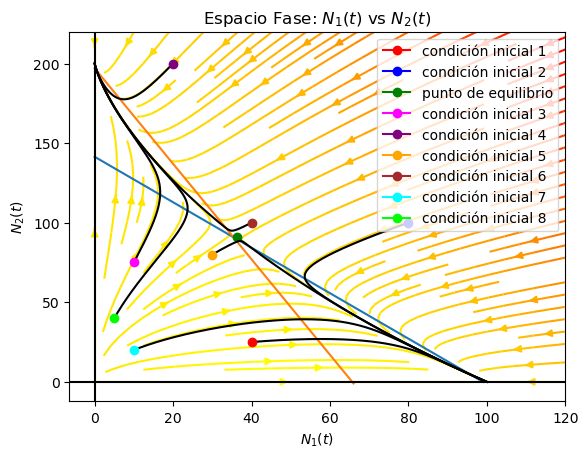

PyObject <matplotlib.legend.Legend object at 0x7fef3bcc0670>

In [8]:
#Espacio fase del sistema de competencia de especies

#Arreglos para el mallado
xs = collect(0:1:120)
ys = collect(0:1:220)

#mallado
X,Y = np.meshgrid(xs,ys)

#Sistema de ecuaciones: competencia de especies
U = r1*X -(r1/K1)*X.*X - (r1*α/K1)*X.*Y
V = r2*Y -(r2/K2)*Y.*Y - (r2*β/K2)*X.*Y

#Grafica de isoclinas
Y1 = []
Y2 = []

for x in 1:K1
    push!(Y1,Iso1(x,K1,α))
end

for x in 1:67
    push!(Y2,Iso2(x,K2,β))
end
x = 1:100
plt.plot(Y1)
plt.plot(Y2)
              
#Gráfica del campo de pendientes
plt.title(L"Espacio Fase: $N_1(t)$ vs $N_2(t)$")
plt.axhline(0,color="black")
plt.axvline(0,color="black")
plt.streamplot(xs,ys,U,V,color=U, cmap=plt.cm.autumn)
plt.xlabel(L"$N_1(t)$")
plt.ylabel(L"$N_2(t)$")

#Condición inicial 1
plt.plot(sol1[:,1],sol1[:,2],color = "black")
plt.plot(40,25, marker="o", color="red",label = "condición inicial 1")

#Condición inicial 2
plt.plot(sol2[:,1],sol2[:,2],color = "black")
plt.plot(80,100, marker="o", color="blue",label = "condición inicial 2")

#Punto de equilibrio
Eqx = K1 - (α*(K2-β*K1))/(1-β*α)
Eqy = (K2-β*K1)/(1-β*α)
plt.plot(Eqx,Eqy, marker = "o", color = "green",label = "punto de equilibrio")

#Condición inicial 3
plt.plot(sol3[:,1],sol3[:,2],color = "black")
plt.plot(10,75, marker="o", color="magenta",label = "condición inicial 3")

#Condición inicial 4
plt.plot(sol4[:,1],sol4[:,2],color = "black")
plt.plot(20,200, marker="o", color="purple",label = "condición inicial 4")

#Condición inicial 5
plt.plot(sol5[:,1],sol5[:,2],color = "black")
plt.plot(30,80, marker="o", color="orange",label = "condición inicial 5")

#Condición inicial 6
plt.plot(sol6[:,1],sol6[:,2],color = "black")
plt.plot(40,100, marker="o", color="brown",label = "condición inicial 6")

#Condición inicial 7
plt.plot(sol7[:,1],sol7[:,2],color = "black")
plt.plot(10,20, marker="o", color="cyan",label = "condición inicial 7")

#Condición inicial 8
plt.plot(sol8[:,1],sol8[:,2],color = "black")
plt.plot(5,40, marker="o", color="lime",label = "condición inicial 8")

plt.legend(loc = "upper right")

 De este gráfico podemos ir concluyendo varias cosas, los puntos de equilibrio atractores efectivamente son $E_2=(0,K_2)$ y $E_3=(K_1,0)$, el origen como punto de equilibrio es una fuente, pues todas las trayectorias son repulsoras hacia los atractores y tenemos un evento muy curioso en el punto de equilibrio de coexistencia, veamos
 

In [9]:
#Si nosotros hacemos ponemos como condición inicial el punto de equilibrio, veamos que pasa
xEq = [K1 - (α*(K2-β*K1))/(1-β*α),(K2-β*K1)/(1-β*α)]
tiempos , solEq = SolucionCE(r1,r2,α,β,K1,K2,xEq,t0,tf,dt)
solEq

10001×2 Matrix{Float64}:
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
  ⋮       
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091
 36.3636  90.9091

Podemos ver como se queda en ese punto sin variar, lo cual quiere decir que es un punto estable para ambas especies. Para este caso podemos ver como este punto de equilibrio actúa como repulsor, sin embargo modificando los parámetros bajo las reglas antes especificadas, podríamos ver su comportamiento atractor.

# Puntos extra 

¿Cómo se tendría que modificar el modelo de predador presa para que pudiera haber una coexistencia
que no fuera una oscilación, sino que las poblaciones alcanzaran valores estables?
Justifique y argumente ampliamente su respuesta.  

Apóyese y modifique el código visto en clase, para mostrar una grafica del plano fase del sistema modificado bajo esas condiciones, que complemente y refuerce su respuesta .
       

En la ecuación de la presa ($N_1$) del sistema presa depredador, podríamos agregar una ecuación logística dentro de la ecuación para poder delimitar la población de presas con base en los recursos que existen en el entorno. El sistema corregido estaría dado de la siguiente manera

\begin{align*}
\dot{N}_1&=\alpha N_1\left(1-\frac{N_1}{K}\right)-\beta N_1N_2\\
\dot{N_2}&=-\gamma N_2+\delta N_1N_2
\end{align*}

Para calcular sus puntos de equilibrio hay que resolver el sistema de ecuaciones

$$
\begin{cases}
\alpha N_1\left(1-\frac{N_1}{K}\right)-\beta N_1N_2=0\\
-\gamma N_2+\delta N_1N_2=0
\end{cases}
$$

de la primera ecuación tenemos

\begin{align*}
\alpha N_1\left(1-\frac{N_1}{K}\right)&=\beta N_1N_2\\
\alpha \left(1-\frac{N_1}{K}\right)&=\beta N_2\\
N_2&=\frac{\alpha}{\beta}\left(1-\frac{N_1}{K}\right)
\end{align*}

de la ecuación dos tenemos que

\begin{align*}
\delta N_1N_2&=\gamma N_2\\
N_1&=\frac{\gamma}{\delta}
\end{align*}

sustituyendo en $N_2$ tenemos

\begin{align*}
N_2=\frac{\alpha}{\beta}\left(1-\frac{\gamma}{\delta K}\right)
\end{align*}

Entonces tenemos el punto de equilibrio 

$$E=\left(\frac{\gamma}{\delta},\frac{\alpha}{\beta}\left(1-\frac{\gamma}{\delta K}\right)\right)$$

veamos un esbozo del espacio fase

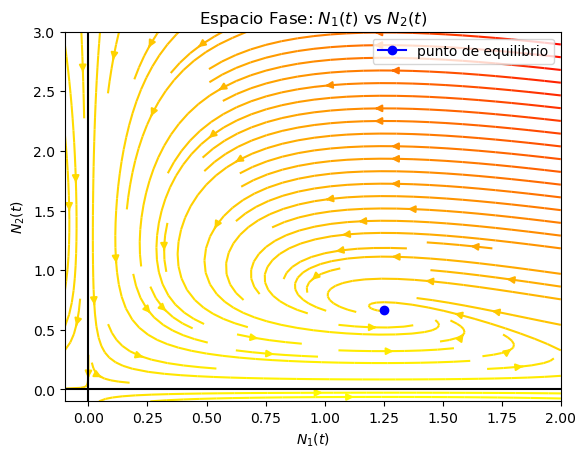

PyObject <matplotlib.legend.Legend object at 0x7fef3b3e71c0>

In [10]:
#=su campo de direcciones; 
en este caso α=2, β=1.5, γ=1, δ=0.8 y K=2.5 =#

xs = collect(-0.1:0.1:2)
ys = collect(-0.1:0.1:3)

X,Y = np.meshgrid(xs,ys)

U = 2X - (2/2.5)X.*X -1.5X.*Y
V = -Y + 0.8X.*Y
plt.title(L"Espacio Fase: $N_1(t)$ vs $N_2(t)$")
plt.axhline(0,color="black")
plt.axvline(0,color="black")
plt.streamplot(xs,ys,U,V,color=U, cmap=plt.cm.autumn)
plt.xlabel(L"$N_1(t)$")
plt.ylabel(L"$N_2(t)$")
plt.plot(1/0.8,2/1.5*(1-1/(0.8*2.5)), marker="o", color="blue",label = "punto de equilibrio") #aquí se encuentra el punto de equilbtio de coexistencia
plt.legend(loc = "upper right")